<h1 align="center" style="color:black"> TITANIC DATA ANALYSIS </h1>

## INTRODUCTION
**Purpose:** Perform simple data analysis on Titanic Dataset.

"One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class." -  https://www.kaggle.com/c/titanic

The dataset contains information of 891 passengers on-board when the disaster happened. In this analysis, I examinate some factors that may contribute to the chance of survival.
- **Q1: Were passenger class as a factor in survival rate? ** 
- **Q2: Did women have a better chance to survive than men?**
- **Q3: Did children has a beter chance to survive than adults?**



## DATA DESCRIPTION
(from https://www.kaggle.com/c/titanic)

VARIABLES
- survival:        Survival (0 = No; 1 = Yes)               
- pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name:            Name
- sex:             Sex
- age:             Age
- sibsp:           Number of Siblings/Spouses Aboard
- parch:           Number of Parents/Children Aboard
- ticket:          Ticket Number
- fare:            Passenger Fare
- cabin:           Cabin
- embarked:        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)              

SPECIAL NOTES:

- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1).If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.
- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [160]:
import unicodecsv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

# passenger_info is a dataframe
passenger_info = pd.read_csv('titanic-data.csv')

Display the first several rows to see the data format

In [161]:
passenger_info.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DATA WRANGLING

** Step 1: Remove duplicated rows**
 

In [162]:
# remove all duplicated row
passenger_info_cleaned = passenger_info.drop_duplicates()

**Step 2: Drop unnecessary columns **

The data contains some columns which are not helpfull for my analysis and these columns therefore can be removed.

In [163]:
passenger_info_cleaned = passenger_info_cleaned.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Fare','Embarked'], axis=1)
passenger_info_cleaned.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


** Step 3: Fix any missing or data format issues **

In [164]:
# Display the datatype to make sure ther is no data format issue
passenger_info_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 34.8+ KB


In [165]:
# Compute number of missing value for each attribute column
passenger_info_cleaned.isnull().sum(axis = 0)


Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

Missing data issue only happends at the 'Age' column. Therefore we  need to take into account when answering the Q3.

## Data Exploration 

At the first step, we should look at some general statistic of the data. 

In [166]:
def general_static_titanic_data(passenger_info_cleaned):
    print "Number of survival/total: {}/{} = {} %".format((passenger_info_cleaned['Survived']==1).sum(),len(passenger_info_cleaned['Survived']), 100* (passenger_info_cleaned['Survived']==1).sum()*1.0/len(passenger_info_cleaned['Survived']))
    
    # compute number and percentage of women survive
    women_survival =   passenger_info_cleaned.groupby(['Survived','Sex']).size().loc[0,'female']
    total_women = passenger_info_cleaned.groupby(['Survived','Sex']).size().loc[:,'female'].sum()
    
    # compute number and percentage of women survive
    men_survival =   passenger_info_cleaned.groupby(['Survived','Sex']).size().loc[0,'male']
    total_men = passenger_info_cleaned.groupby(['Survived','Sex']).size().loc[:,'male'].sum()
    
    print "Number of women survival/number of women: {}/{} = {} %".format(women_survival,total_women,women_survival*100.0/total_women)
    print "Number of men survival/number of men: {}/{} = {} %".format(men_survival,total_men,men_survival*100.0/total_men)
    
    print "Youngest to survive: {}".format(passenger_info_cleaned[passenger_info_cleaned['Survived'] == 1]['Age'].min())
    print "Youngest to die: {}".format(passenger_info_cleaned[passenger_info_cleaned['Survived'] == 0]['Age'].min())
    print "Oldest to survive: {}".format(passenger_info_cleaned[passenger_info_cleaned['Survived'] == 1]['Age'].max())
    print "Oldest to die: {}".format(passenger_info_cleaned[passenger_info_cleaned['Survived'] == 0]['Age'].max())

In [167]:
general_static_titanic_data(passenger_info_cleaned)

Number of survival/total: 342/891 = 38.3838383838 %
Number of women survival/number of women: 81/314 = 25.7961783439 %
Number of men survival/number of men: 468/577 = 81.1091854419 %
Youngest to survive: 0.42
Youngest to die: 1.0
Oldest to survive: 80.0
Oldest to die: 74.0


** Q1: Were passenger class as a factor in survival rate?**

To answer this question, we need to compute the raw number and survival percentage for each passenger class. More specifically, we compute the distribution or histogram of conditional probability P(Survived = 1 | Pclass = class)

In [168]:
def survival_groupby_class(passenger_info_cleaned, pclass):
    passenger_info_cleaned_groupedby  = passenger_info_cleaned.groupby(['Survived','Pclass']).size()
    survival_in_pclass  = passenger_info_cleaned_groupedby.loc[1,pclass]
    total_passenger_in_pclass = passenger_info_cleaned_groupedby[:,pclass].sum()
    return survival_in_pclass,total_passenger_in_pclass
    



In [169]:
class_1_survival, class_1_total = survival_groupby_class(passenger_info_cleaned, 1)
class_2_survival, class_2_total = survival_groupby_class(passenger_info_cleaned, 2)
class_3_survival, class_3_total = survival_groupby_class(passenger_info_cleaned, 3)

#survival_rate_pclass
print 'Class 1: survival rate: {}%'.format((100.0*class_1_survival/class_1_total).round(2))
print 'Class 2: survival rate: {}%'.format((100.0*class_2_survival/class_2_total).round(2))
print 'Class 3: survival rate: {}%'.format((100.0*class_3_survival/class_3_total).round(2))


Class 1: survival rate: 62.96%
Class 2: survival rate: 47.28%
Class 3: survival rate: 24.24%


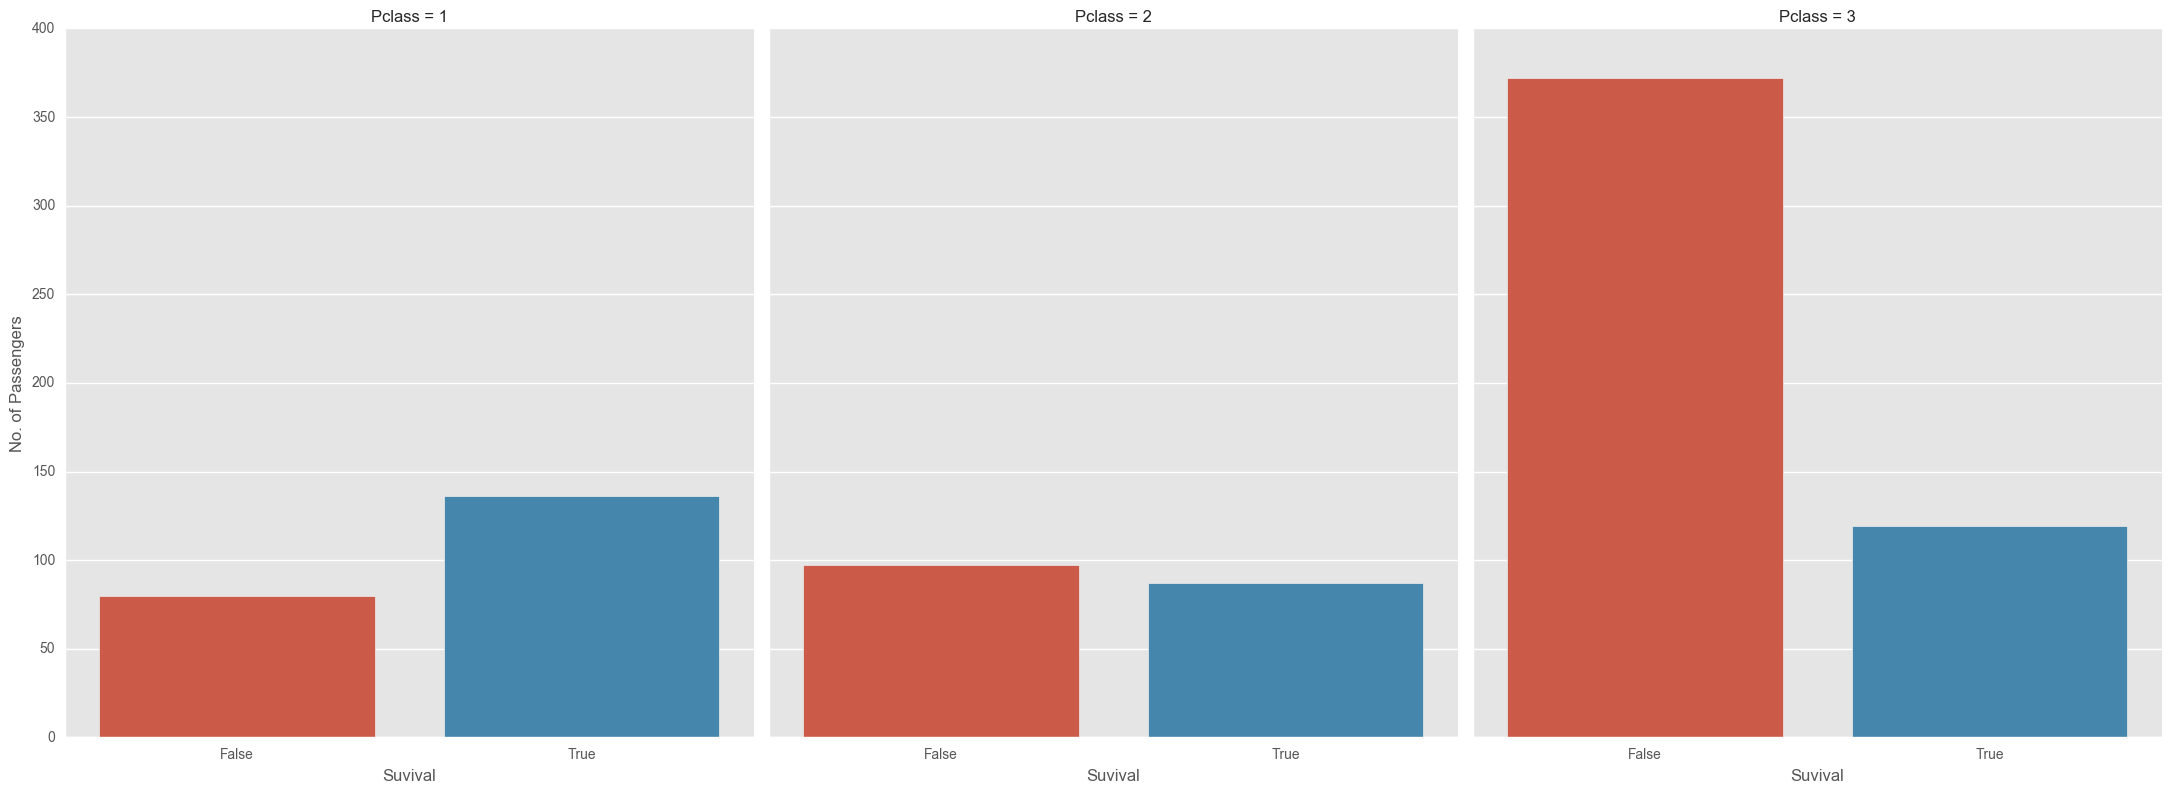

In [170]:
g1 = sns.factorplot('Survived', col='Pclass', data=passenger_info_cleaned, kind='count', size=8, aspect=.9)
# Fix up the labels
(g1.set_axis_labels('Suvival', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)
titles = ['Class 1', 'Class 2', 'Class 3']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


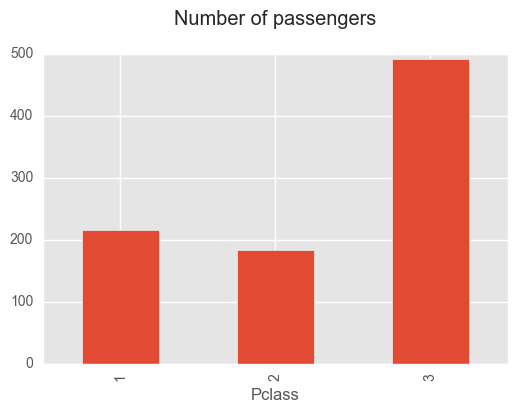

In [171]:
# We also display number of passengers for each class
g2 = passenger_info_cleaned.groupby(['Pclass']).size().plot(kind='bar',title='Number of passengers\n')

** Number of passengers and a survival percentage for each class**

- *Class 1: 216, survival percentage: 62.96%*
- *Class 2: 184, survival percentage: 47.28%*
- *Class 3: 491, survival percentage: 24.24%*

By reviewing the quantitative numbers for three passenger classes and the charts above, we can conclude that the passenger class clearly stands a factor to survival rate. In particular, passengers of class 1 likely have the best chance of survival when the disaster happened. It is possible that the cabin locations for each class  account for the different rates.

**Q2: Did women have a better chance to survive than men?**

In this section, we need to compute the survival percentages for women and men. In order to avoid the bias of the data, the distribution of the number of women and men along with each Pclass need to be taken into account. 

P(Survived = 1 | Sex = women) > P(Survived = 1 | Sex = men) ?

In [172]:
def survival_rate_sex(passenger_info_cleaned,pclass):
    passenger_info_cleaned_groupby_class = passenger_info_cleaned.groupby(['Survived','Sex','Pclass']).size()
    number_men_pclass = passenger_info_cleaned_groupby_class.loc[:,'male',pclass].sum()
    number_women_pclass = passenger_info_cleaned_groupby_class.loc[:,'female',pclass].sum()
    
    number_survival_men_pclass = passenger_info_cleaned_groupby_class.loc[1,'male',pclass].sum()
    number_survival_women_pclass = passenger_info_cleaned_groupby_class.loc[1,'female',pclass].sum()
    
    print "The number of men in class {}: {} and survival rate: {}%".format(pclass,number_men_pclass,(100.0*number_survival_men_pclass/number_men_pclass).round(2))
    print "The number of women in class {}: {} and survival rate: {}%".format(pclass,number_women_pclass,(100.0*number_survival_women_pclass/number_women_pclass).round(2))
    return number_men_pclass,number_survival_men_pclass,number_women_pclass,number_survival_women_pclass

In [173]:
for i in xrange(1,4):
    survival_rate_sex(passenger_info_cleaned,i)

The number of men in class 1: 122 and survival rate: 36.89%
The number of women in class 1: 94 and survival rate: 96.81%
The number of men in class 2: 108 and survival rate: 15.74%
The number of women in class 2: 76 and survival rate: 92.11%
The number of men in class 3: 347 and survival rate: 13.54%
The number of women in class 3: 144 and survival rate: 50.0%


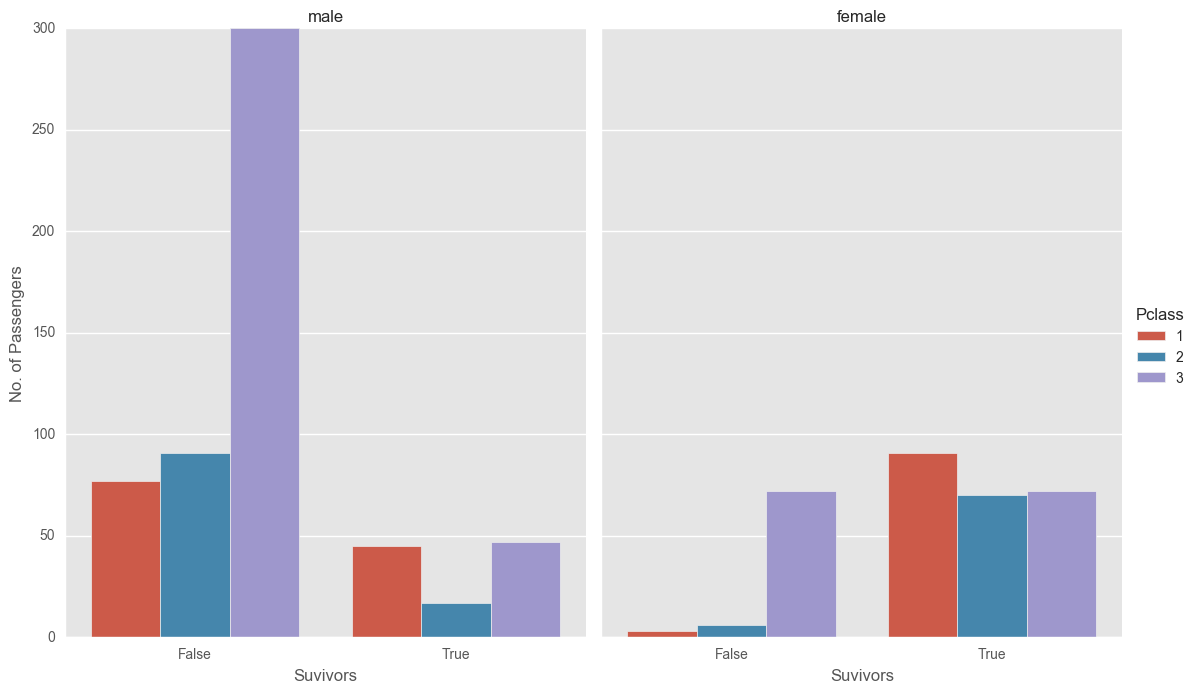

In [174]:
# Graph - Actual count of passengers by survival grouped by sex
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=passenger_info_cleaned, kind='count', size=7, aspect=.8)
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)


**Sex distributions and survival percentages along with passenger classes **
- *The number of men in class 1: 122 and survival rate: 36.89%*
- *The number of women in class 1: 94 and survival rate: 96.81%*
- *The number of men in class 2: 108 and survival rate: 15.74%*
- *The number of women in class 2: 76 and survival rate: 92.11%*
- *The number of men in class 3: 347 and survival rate: 13.54%*
- *The number of women in class 3: 144 and survival rate: 50.00%*

Obviously, the women had a better chance to survive than men. Those numbers support the idea that "lady first" played a role in the survival rate. In pclass 3, more women didn't survive due to probably their cabin locations.





**Q3: Did children has a beter chance to survive than adults?**


Since the data does not tell us who is an adult and who is a child, we need to assume a cut-off point. We consider those under 18 as children.

In this question, we try to compute the distributions of P('survival' = 1 | 'Age' < 18, 'Pclass' = pclass) and P('survival' = 1 | 'Age' >=18, 'Pclass' = pclass)

In [182]:
# Function to compute number of survival children and its percentage along with passenger class
def children_survival_info(passenger_info_cleaned, age_thres, pclass):
    # input: passenger_info_cleaned - passenger information
    #        age_thres - age cutoff point
    #        pclass - passenger class
    # Output: Number of survival children and its percentage
    passenger_info_cleaned_by_pclass= passenger_info_cleaned[passenger_info_cleaned['Pclass'] ==pclass]
    children_info_cleaned_by_pclass = passenger_info_cleaned_by_pclass[passenger_info_cleaned_by_pclass['Age']<age_thres]
    number_of_survival_children = len(children_info_cleaned_by_pclass[children_info_cleaned_by_pclass['Survived'] == 1])
    return number_of_survival_children,len(children_info_cleaned_by_pclass)

# Function to compute number of survival children and its percentage along with passenger class
def adult_survival_info(passenger_info_cleaned, age_thres, pclass):
    # input: passenger_info_cleaned - passenger information
    #        age_thres - age cutoff point
    #        pclass - passenger class
    # Output: Number of survival children and its percentage
    passenger_info_cleaned_by_pclass= passenger_info_cleaned[passenger_info_cleaned['Pclass'] ==pclass]
    adult_info_cleaned_by_pclass = passenger_info_cleaned_by_pclass[passenger_info_cleaned_by_pclass['Age']>=age_thres]
    number_of_survival_adult = len(adult_info_cleaned_by_pclass[adult_info_cleaned_by_pclass['Survived'] == 1])
    return number_of_survival_adult, len(adult_info_cleaned_by_pclass)
    

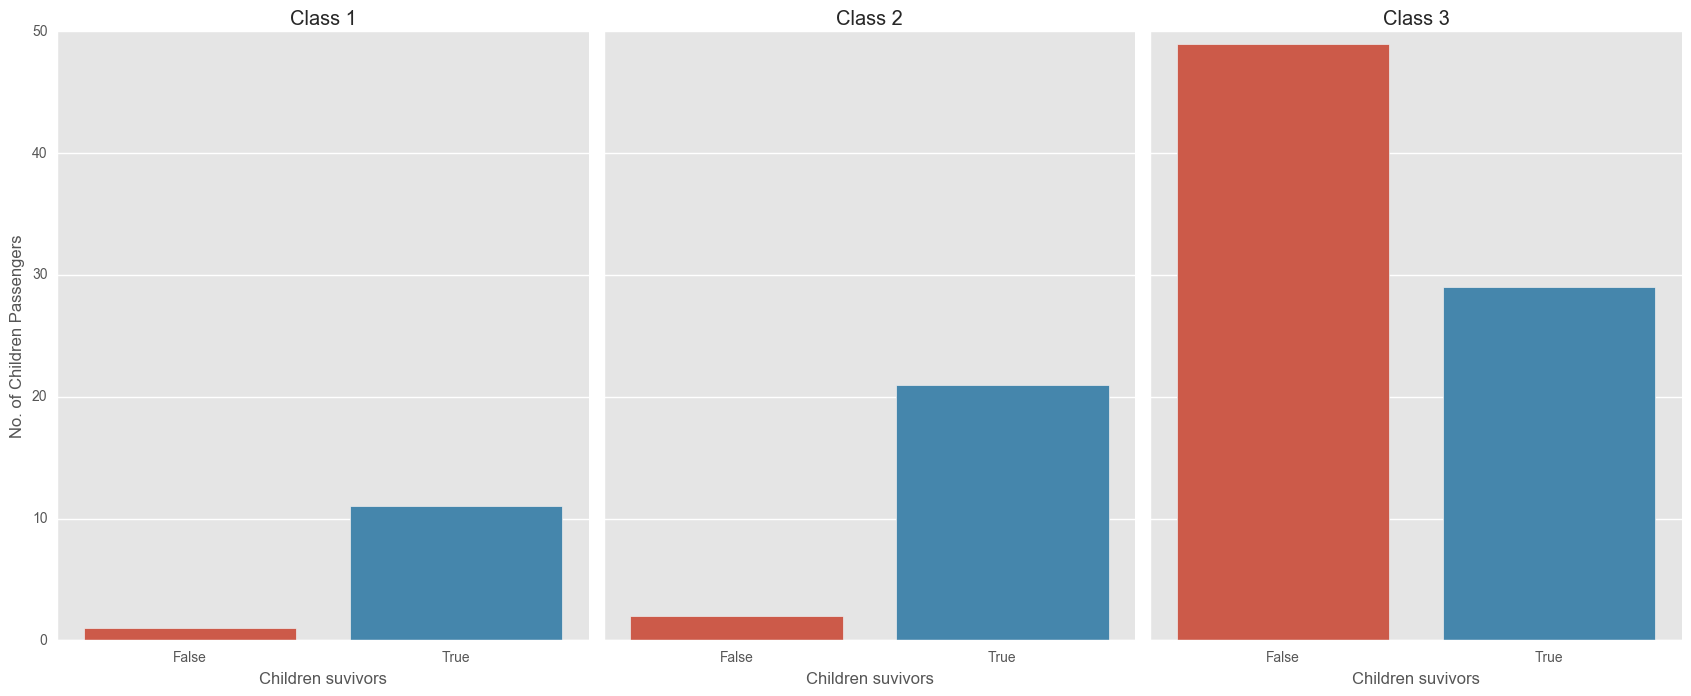

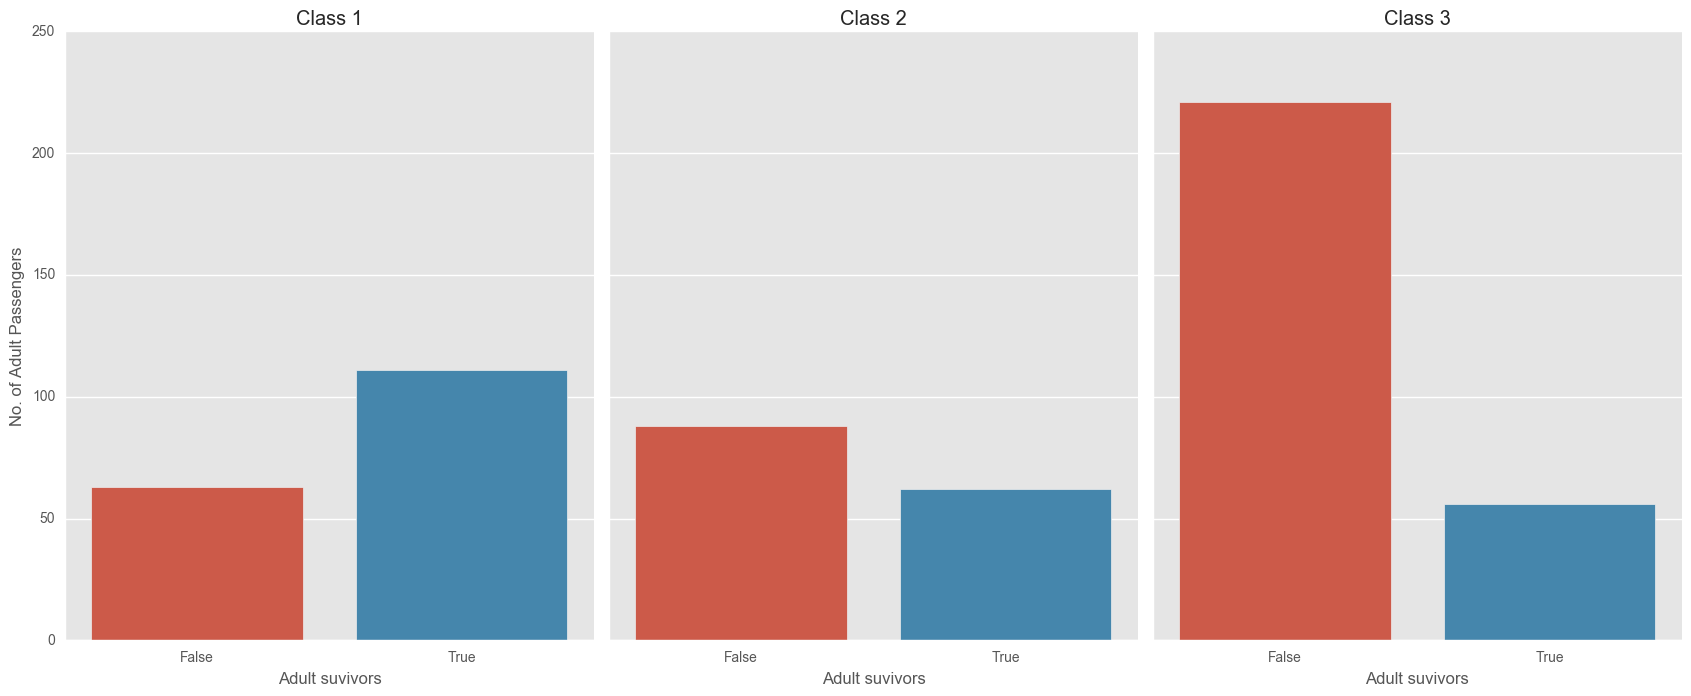

In [183]:
children_info_cleaned = passenger_info_cleaned[passenger_info_cleaned['Age']<18]
g = sns.factorplot('Survived', col='Pclass', data=children_info_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Children suvivors', 'No. of Children Passengers')
    .set_xticklabels(['False', 'True'])
)
titles = ['Class 1', 'Class 2', 'Class 3']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

adult_info_cleaned = passenger_info_cleaned[passenger_info_cleaned['Age']>=18]
g = sns.factorplot('Survived', col='Pclass', data=adult_info_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Adult suvivors', 'No. of Adult Passengers')
    .set_xticklabels(['False', 'True'])
)
titles = ['Class 1', 'Class 2', 'Class 3']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


In [202]:
print "Class 1:\n No. survival children/total children: {}/{}".format(children_survival_info(passenger_info_cleaned,18,1)[0],children_survival_info(passenger_info_cleaned,18,1)[1])
print " No. survival adults/total adults: {}/{}\n".format(adult_survival_info(passenger_info_cleaned,18,1)[0],adult_survival_info(passenger_info_cleaned,18,1)[1])

print "Class 2:\n No. survival children/total children: {}/{}".format(children_survival_info(passenger_info_cleaned,18,2)[0],children_survival_info(passenger_info_cleaned,18,2)[1])
print " No. survival adults/total adults: {}/{}\n".format(adult_survival_info(passenger_info_cleaned,18,2)[0],adult_survival_info(passenger_info_cleaned,18,2)[1])
print "Class 3\n No. survival children/total children: {}/{}".format(children_survival_info(passenger_info_cleaned,18,3)[0],children_survival_info(passenger_info_cleaned,18,3)[1])
print " No. survival adults/total adults: {}/{}".format(adult_survival_info(passenger_info_cleaned,18,3)[0],adult_survival_info(passenger_info_cleaned,18,3)[1])
print "============================================================================================================================"


Class 1:
 No. survival children/total children: 11/12
 No. survival adults/total adults: 111/174

Class 2:
 No. survival children/total children: 21/23
 No. survival adults/total adults: 62/150

Class 3
 No. survival children/total children: 29/78
 No. survival adults/total adults: 56/277


Based on the analysis above, it appears that the children have a better chance to survive than the adults. While most of the children in class 1 and 2 survived, only 37.17% children in class 3 survived. However this rate still higher than one for adult (20.21%)

<h3 align="left" style="color:blue">Conclusion

From the results of the analysis, it would appear that passenger class, sex affect to the survival chance when the disaster happened. More specifically, passengers with upper social-economic standing would have more chance to survive. Women had more chance than the men and children had more chance than adults. Those support to the idea that "women and children first" when the tragedy occurred. In class 3, more children and women did not survive due to probably their locations.
